# Dataset Preview

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Information and Missing Values

There are total 21 columns and no missing values in the whole dataset.

In [2]:
# Basic info
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

# Data Pre-Processing and Cleaning

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Handle TotalCharges column (convert to numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill any new NaN from TotalCharges conversion
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop customerID as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Label encode binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# One-hot encode the remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

print("Dataset after preprocessing:")
print(df.head())

Dataset after preprocessing:
   SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0        1           0       1             0                 1   
1              0        0           0      34             1                 0   
2              0        0           0       2             1                 1   
3              0        0           0      45             0                 0   
4              0        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  Churn  gender_Male  ...  TechSupport_Yes  \
0           29.85         29.85      0        False  ...            False   
1           56.95       1889.50      0         True  ...            False   
2           53.85        108.15      1         True  ...            False   
3           42.30       1840.75      0         True  ...             True   
4           70.70        151.65      1        False  ...            False   

   StreamingTV_No int

/tmp/ipykernel_35/599466124.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


# Churn Classification - Yes / No

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8176011355571328

Confusion Matrix:
 [[931 105]
 [152 221]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



**Insight:**
- High precision for class 0: Model is confident when predicting no churn.
- Lower recall for class 1: It's missing a lot of churners — that’s where the improvement lies.
- We’re catching most of the non-churners, but a decent number of churners are slipping through.
- The model correctly predicted customer churn or non-churn 82 out of every 100 times (81.76 % accuracy).

# Confusion Matrix Visualization

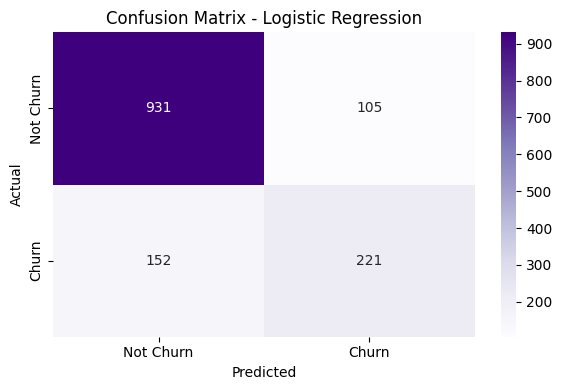

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Your predictions should already be there as y_pred
# And actual labels as y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis - Why Churn results are that way?
## 1) Basic Data Information and Structure:

In [6]:
df.info()
df.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null  

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


**Insight:**
- 7043 customers (rows) and 31 features (columns)
- target variable is 'Churn' (0 or 1)
- numerical features are 'tenure', 'MonthlyCharges' and 'TotalCharges'
- no null values are to be found
- categorical features encoded as bools found - 'Contract_One year', 'gender_Male', 'StreamingTV_Yes', etc.

## 2) Univariate Analysis:
Refers to studying each feature in a detailed manner.

### Numerical Features: tenure, monthlyCharges, and totalCharges

In [8]:
import warnings
warnings.filterwarnings("ignore")

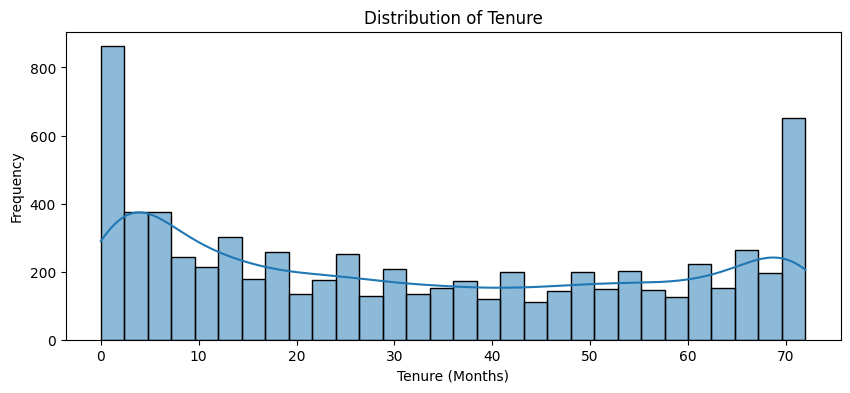

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'tenure' feature:
plt.figure(figsize=(10, 4))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

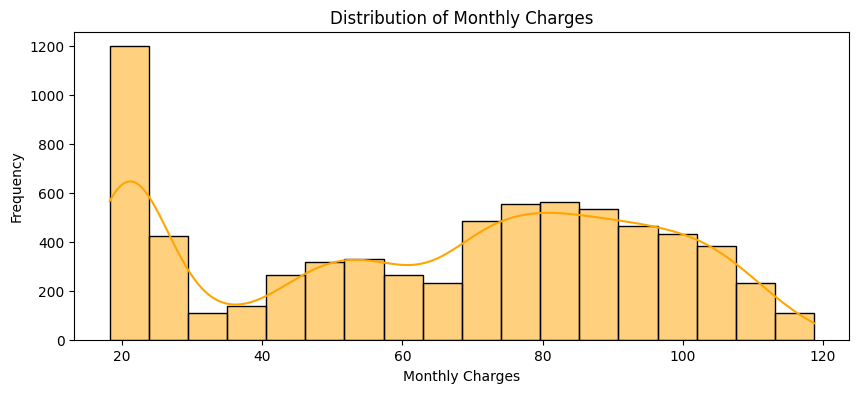

In [10]:
# 'MonthlyCharges' feature
plt.figure(figsize=(10, 4))
sns.histplot(df['MonthlyCharges'], kde=True, color='orange')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

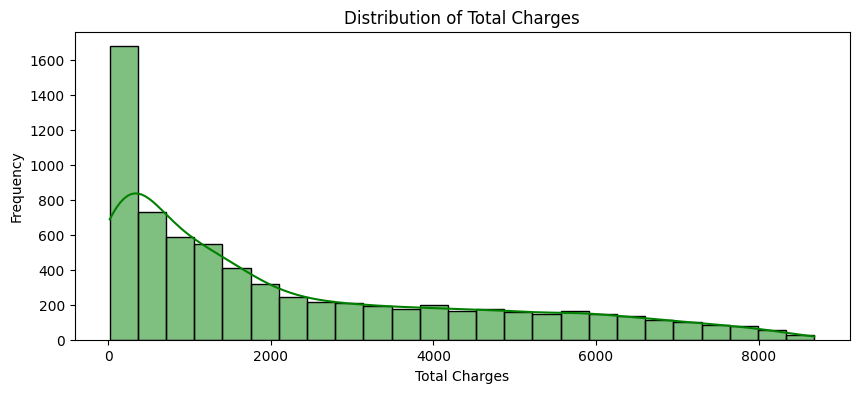

In [11]:
# 'TotalCharges' feature
plt.figure(figsize=(10, 4))
sns.histplot(df['TotalCharges'], kde=True, color='green')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

In [12]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


**Insights - Tenure:**
- Average tenure is 32.37 months meaning roughly 3 years
- The std (standard deviation) is 24.56, which is quite large. This means there is a lot of variability in how long customers have been with the company.
- The minimum tenure is 0 months, which means some customers just joined or perhaps canceled immediately.
- The maximum tenure is 72 months, meaning the longest a customer has been with the company is 6 years.
- 25% of the customers have been with the company for 9 months or less, the median tenure is 29 months, and 75% of the customers have been with the company for less than 55 months.

Customers with shorter tenures are at a higher risk of churn.

**Insights - MonthlyCharges**
- The average MonthlyCharge is 64.76
- The standard deviation is 30.09, indicating a good range of values
- The minimum monthly charge is 18.25, which likely corresponds to the basic plan or possibly a free trial
- The maximum monthly charge is 118.75, which is likely a premium plan
- 25% of customers pay 35.50 or less per month, median monthly charge is 70.35, and 75% of the customers pay less than 89.85 monthly

High Monthly Charges might be correlated with higher churn, depending on whether customers feel they are getting value for money.

**Insights - TotalCharges**
- The average TotalCharges is 2281.92
- A standard deviation of 2265.27 means there's a lot of variation in the total money customers have paid.
- The minimum value is 18.80, suggesting that some customers are very new
- The maximum value is 8684.80, which is likely someone who has been with the company for a long time and possibly on a premium or high-value plan.
- 25% of the customers have paid 402.23 or less, median total charges is 1397.48, and 75% of customers have paid less than 3786.60 in total.

A low total charge could correlate with newer customers or customers on cheaper plans, while higher total charges could suggest longer-term customers.

### Categorical Features: gender_Male, Contract_One Year

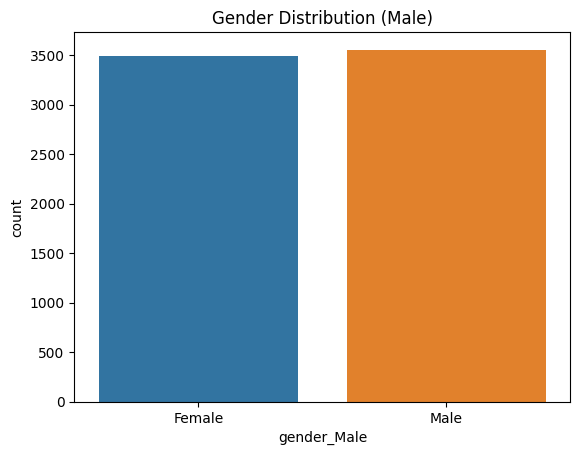

In [13]:
sns.countplot(x='gender_Male', data=df)
plt.title("Gender Distribution (Male)")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

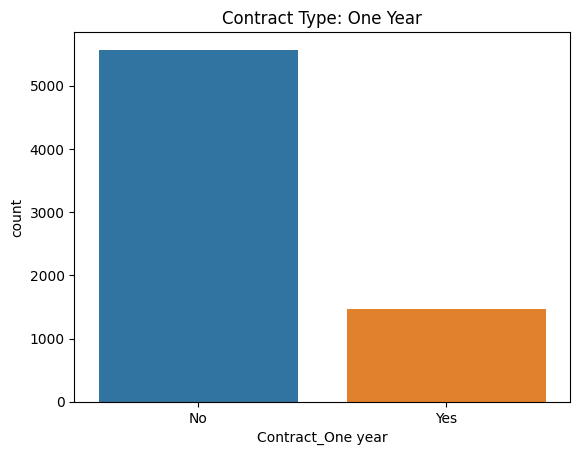

In [14]:
sns.countplot(x='Contract_One year', data=df)
plt.title("Contract Type: One Year")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [21]:
df[['Contract_One year', 'gender_Male']].describe()

,Contract_One year,gender_Male
count,7043,7043
unique,2,2
top,False,True
freq,5570,3555


**Insights - Contract_One year**
- The most frequent value is False, meaning most customers don’t have a one-year contract.
- Most customers seem to be on month-to-month contracts, which suggests they may have more flexibility and may be more likely to churn.

**Insights - gender_Male**
- The most frequent value is True, meaning there are more male customers than female customers.
- There’s a slight male dominance in the dataset, but the gender distribution is quite balanced. 

## 3) Bivariate & Multivariate Analysis:

### 1️⃣ Numerical vs. Churn:

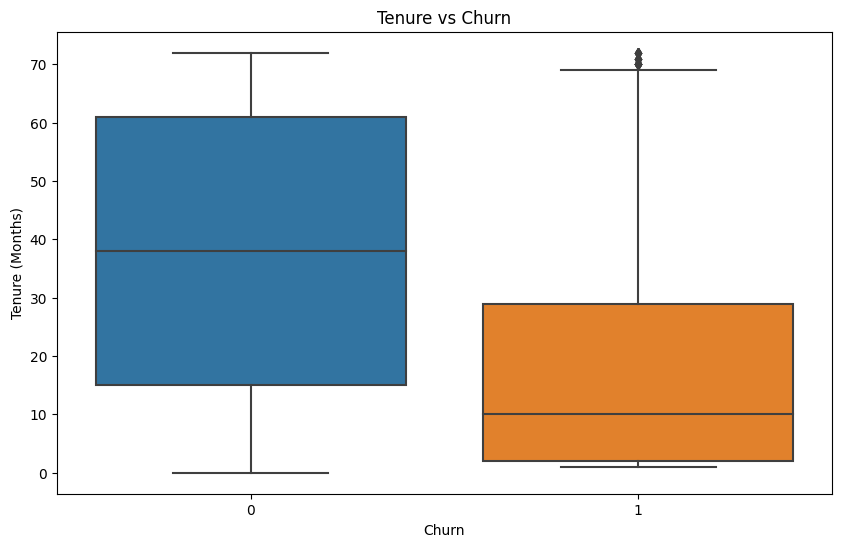

In [15]:
# tenure vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

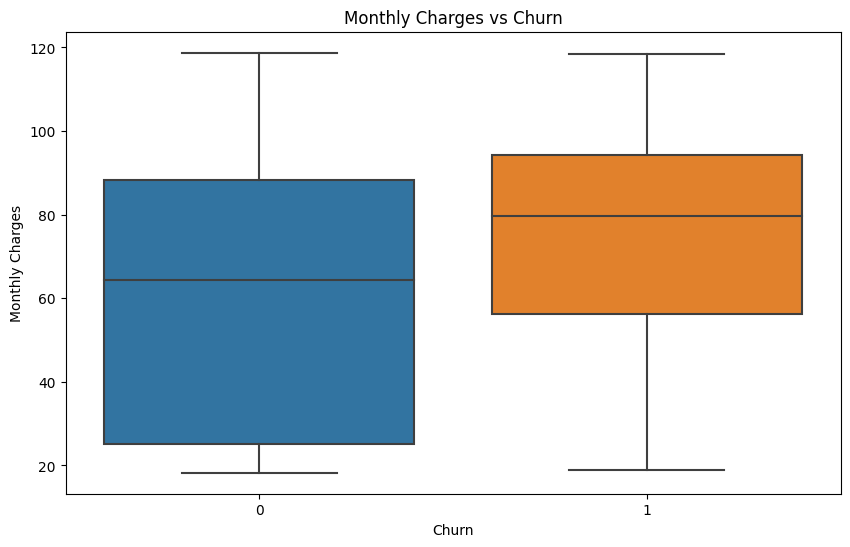

In [16]:
# monthlycharges vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

**Insight:**
- The central tendency (median) of no churn is higher compared to the other.
- Long whiskers of churn as yes indicate a wide spread of values and possible outliers, while the short whiskers of no churn suggest that the values are more concentrated around the median.

### 2️⃣ Categorical vs. Churn:

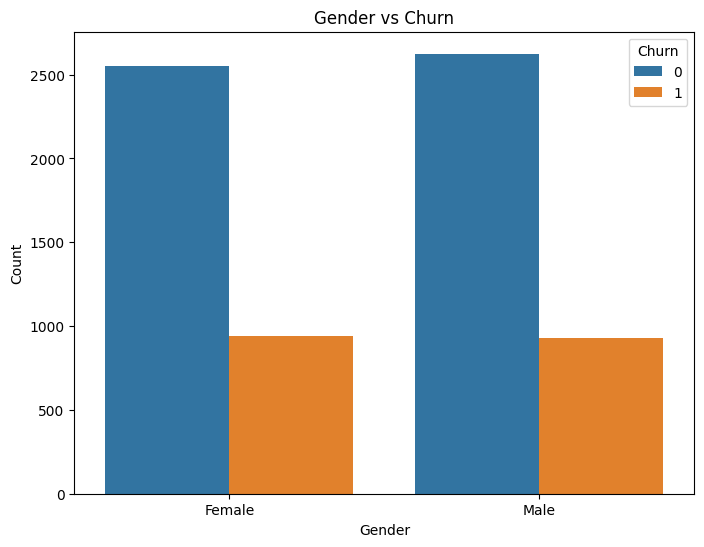

In [17]:
#gender vs churn
plt.figure(figsize=(8, 6))
sns.countplot(x='gender_Male', hue='Churn', data=df)
plt.title("Gender vs Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

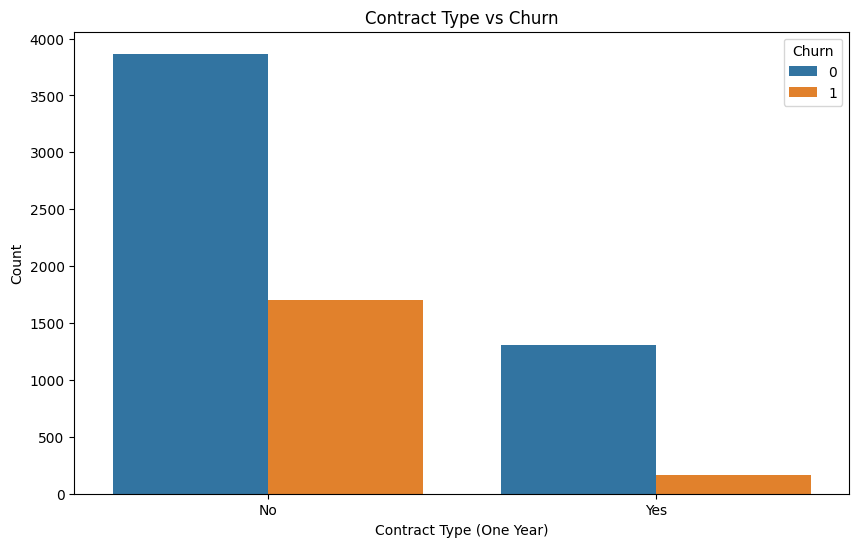

In [22]:
#contract type vs churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract_One year', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type (One Year)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

**Insight:**
- Genders are well-balanced.
- Customers without any contract type are more in number. But in both types the ones with no churn are more.  

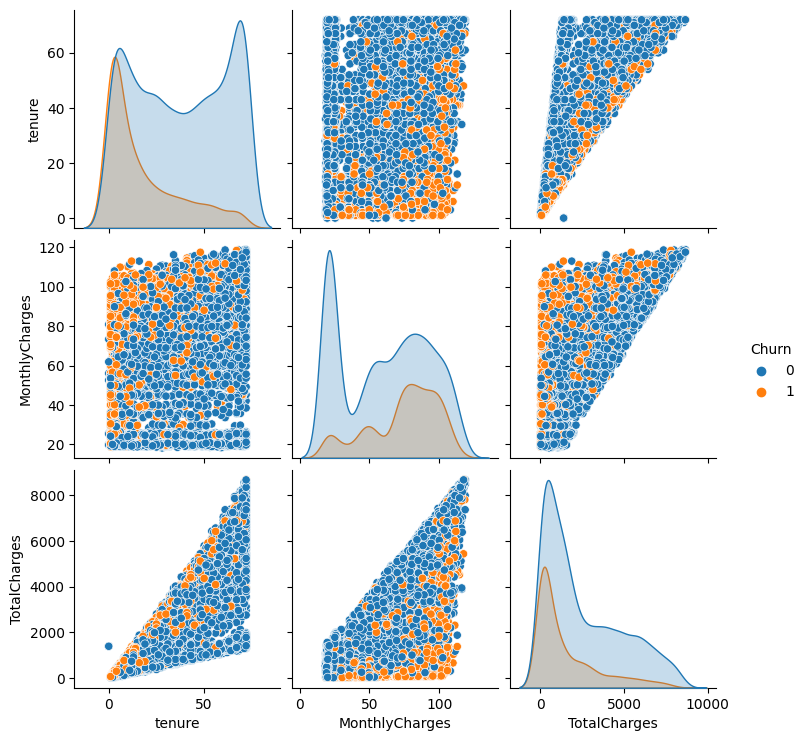

In [18]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

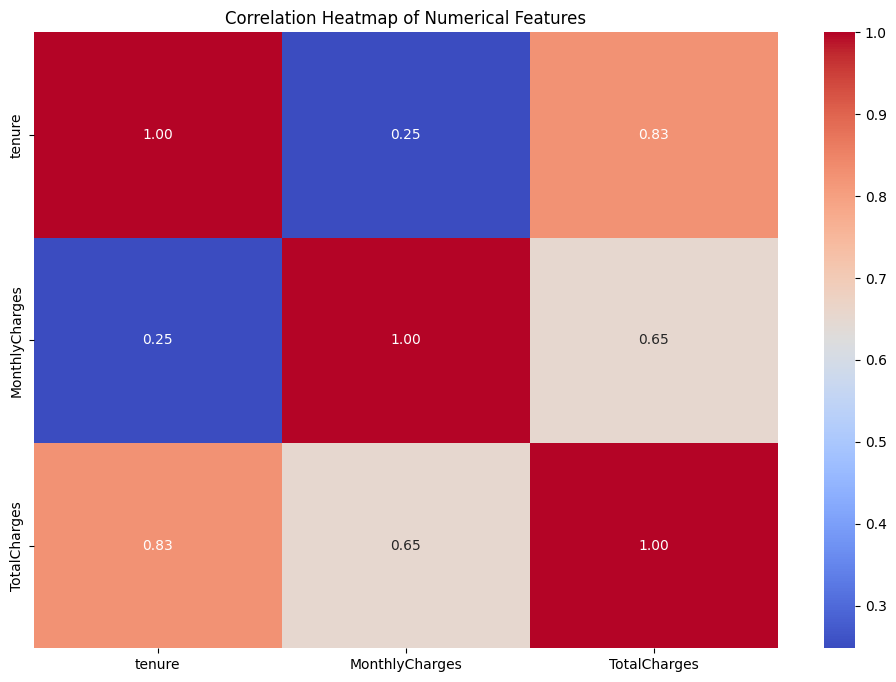

In [19]:
plt.figure(figsize=(12, 8))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Insights:**
- tenure vs totalCharges shows a strong positive correlation (loyal customers tend to contribute more revenue over time)
- monthlycharges vs totalcharges shows a moderate positive correlation (customer might pay a high monthly charge but still be new)
- tenure vs monthlycharges shows a weak positive correlation (even long-tenure customers might have low monthly plans, or vice versa)

## Feature Engineering
- AvgChargesPerMonth: We'll calculate this only where tenure > 0 to avoid division by zero.
- SeniorAlone: This will be 1 if the person is a senior citizen and has neither a partner nor dependents.

In [23]:
import numpy as np

# Avoid division by zero
df['AvgChargesPerMonth'] = np.where(df['tenure'] == 0, 0, df['TotalCharges'] / df['tenure'])
df['SeniorAlone'] = np.where((df['SeniorCitizen'] == 1) & (df['Partner'] == 0) & (df['Dependents'] == 0), 1, 0)

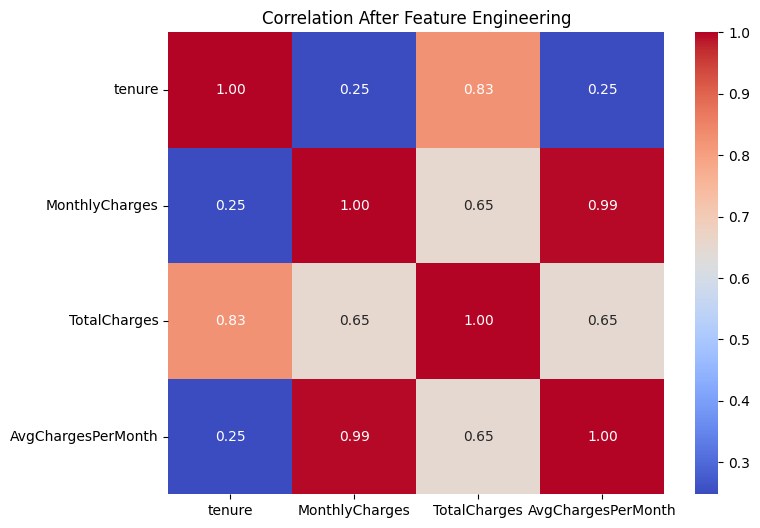

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation After Feature Engineering")
plt.show()


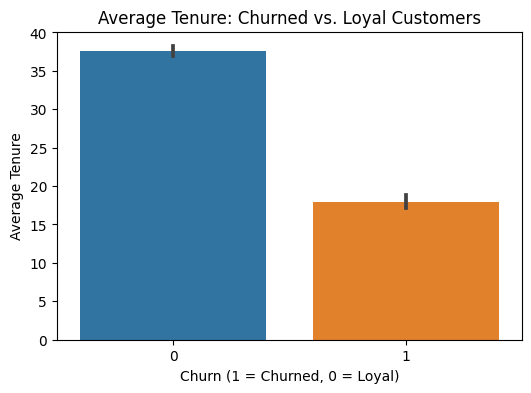

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64


In [25]:
# Average Tenure of Churned vs Loyal Customers 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Churn', y='tenure')
plt.title("Average Tenure: Churned vs. Loyal Customers")
plt.xlabel("Churn (1 = Churned, 0 = Loyal)")
plt.ylabel("Average Tenure")
plt.show()

# Optional: Print the mean values
print(df.groupby('Churn')['tenure'].mean())

**Insight:** Churned users have lower average tenure, that means they tend to leave early — suggesting first few months are crucial.

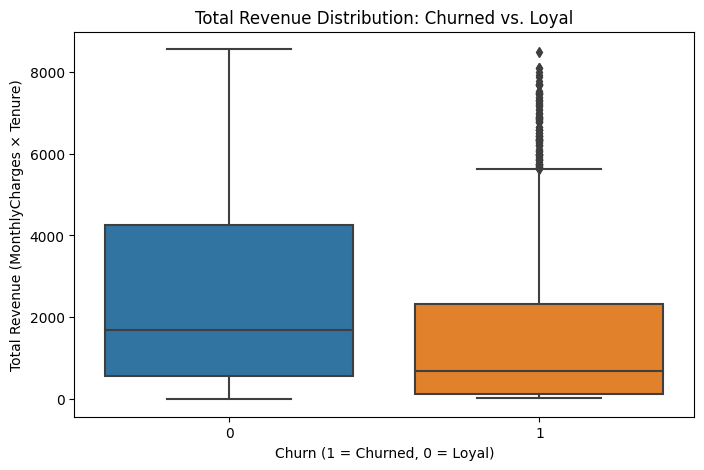

Churn
0    1687.125
1     700.000
Name: TotalRevenue, dtype: float64


In [26]:
# Revenue Distribution (MonthlyCharges × Tenure)
df['TotalRevenue'] = df['MonthlyCharges'] * df['tenure']

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='TotalRevenue')
plt.title("Total Revenue Distribution: Churned vs. Loyal")
plt.xlabel("Churn (1 = Churned, 0 = Loyal)")
plt.ylabel("Total Revenue (MonthlyCharges × Tenure)")
plt.show()

# Optional: Median revenue values
print(df.groupby('Churn')['TotalRevenue'].median())

**Insight:** Loyal customers have higher revenue, it confirms retaining customers boosts revenue.


Churn Rate by InternetService_Fiber optic:
InternetService_Fiber optic
False    0.144920
True     0.418928
Name: Churn, dtype: float64

Churn Rate by Contract_One year:
Contract_One year
False    0.305745
True     0.112695
Name: Churn, dtype: float64

Churn Rate by Contract_Two year:
Contract_Two year
False    0.340501
True     0.028319
Name: Churn, dtype: float64

Churn Rate by TechSupport_Yes:
TechSupport_Yes
False    0.311862
True     0.151663
Name: Churn, dtype: float64


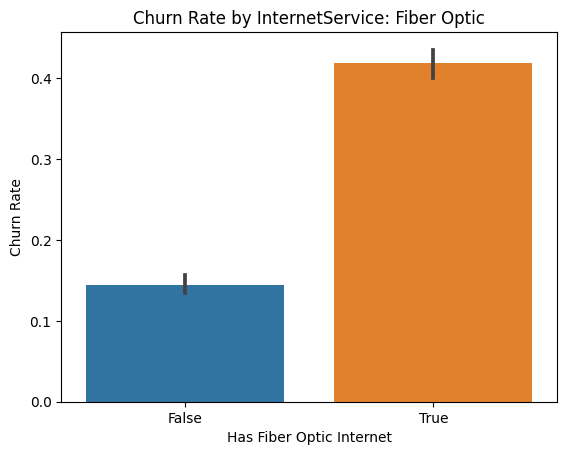

In [27]:
#  Which Services Contribute More to Churn
service_features = ['InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year', 'TechSupport_Yes']

for feature in service_features:
    churn_rate = df.groupby(feature)['Churn'].mean()
    print(f"\nChurn Rate by {feature}:\n{churn_rate}")

sns.barplot(x='InternetService_Fiber optic', y='Churn', data=df)
plt.title("Churn Rate by InternetService: Fiber Optic")
plt.xlabel("Has Fiber Optic Internet")
plt.ylabel("Churn Rate")
plt.show()

**Insight:** High churn in specific services (like fiber optic or month-to-month contracts) can guide retention strategies — maybe those plans need better onboarding or customer support.

# Checking the results with EDA and feature engineering done with a Decision Tree Classifier:

In [31]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'AvgChargesPerMonth', 'SeniorAlone', 'TotalRevenue'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalRevenue']

X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on test set
y_pred = dtree.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7338537970191625

Confusion Matrix:
 [[845 190]
 [185 189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.50      0.51      0.50       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred = log_model.predict(X_test)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8069552874378992

Confusion Matrix:
 [[927 108]
 [164 210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



**Insight:** 

> **Before Feature Engineering:**

**Approach**: You dropped irrelevant or duplicate features, did basic preprocessing.
- Accuracy: 81.76%
- Recall for churn class (1): 0.59

The model was working with a clean and direct dataset, and Logistic Regression — being a linear model — performed well with less clutter.

> **After Feature Engineering:**

**Approach**: You added derived or one-hot encoded features (more columns), maybe introduced multicollinearity or sparse info.
- Accuracy: 80.69%
- Recall for churn class (1): 0.56 (slightly down)

Here, although feature engineering gave more data to work with, not all added features may have been useful or necessary for Logistic Regression. 
- Introduced correlation (like multiple "No internet service" features).
- Added sparsity due to binary one-hot encoded columns.
- Possibly caused overfitting or underfitting if not scaled well.